<a href="https://colab.research.google.com/github/Pujita04/Multiple-Linear-Regression/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_index = pd.read_csv("economic_index.csv")

In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
#drop unneccessory columns
df_index.drop(columns=['Unnamed: 0', "year", "month"], axis=1, inplace = True)

In [5]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
df_index.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


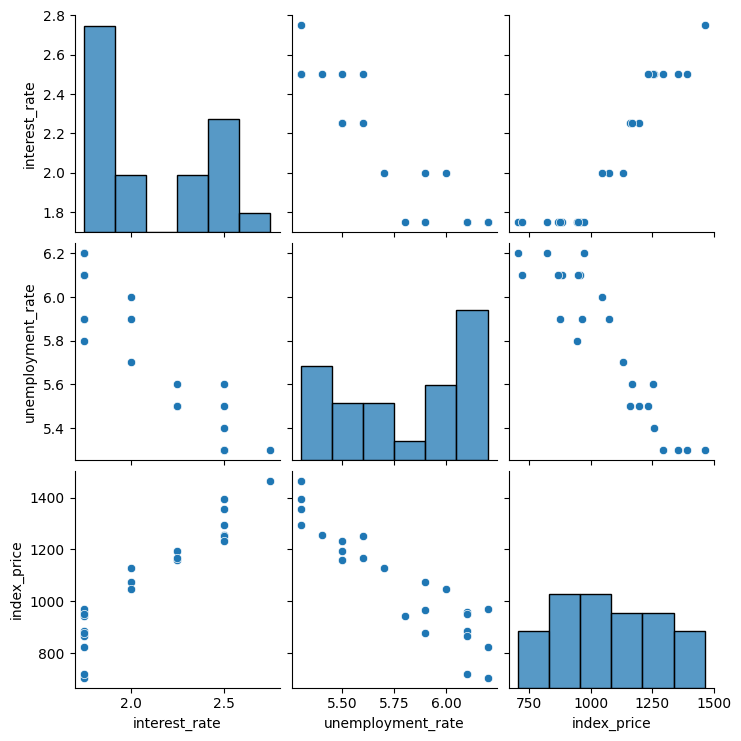

In [7]:
import seaborn as sns
sns.pairplot(df_index)

In [8]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


From this we can see:
interest_rate ans unemployment_rate has negative correaltion
interest_rate and index_price has positive correaltion
unemployment_rate and index_price has negative correlation

Text(0, 0.5, 'Unemployment rate')

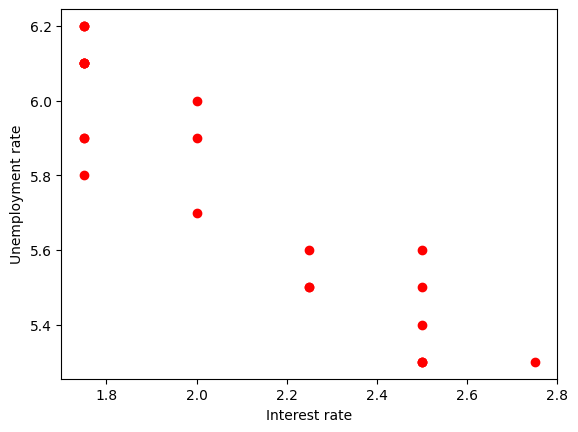

In [9]:
## Visualize the datapoints more closely
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color = 'r')
plt.xlabel("Interest rate")
plt.ylabel("Unemployment rate")

In [11]:
#independent and dependent features
X = df_index.iloc[:,:-1]
y = df_index.iloc[:,-1]

In [12]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [13]:
y

,index_price
0,1464
1,1394
2,1357
3,1293
4,1256
5,1254
6,1234
7,1195
8,1159
9,1167


In [14]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [15]:
import seaborn as sns

In [19]:
sns.regplot(df_index['interest_rate'],df_index['index_price'])

TypeError: regplot() takes from 0 to 1 positional arguments but 2 were given

<Axes: xlabel='interest_rate', ylabel='index_price'>

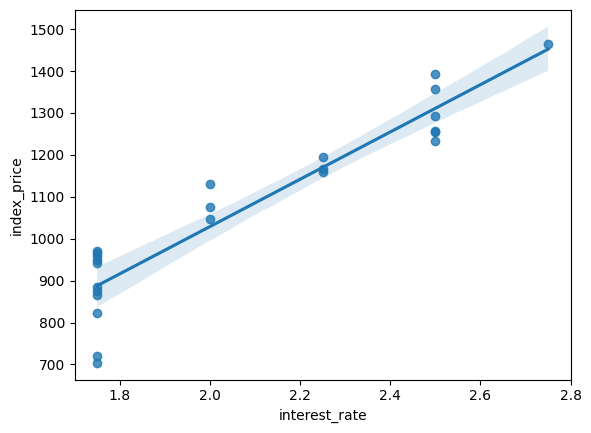

In [20]:
sns.regplot(x=df_index['interest_rate'], y=df_index['index_price']) # Specify variables using keyword arguments

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

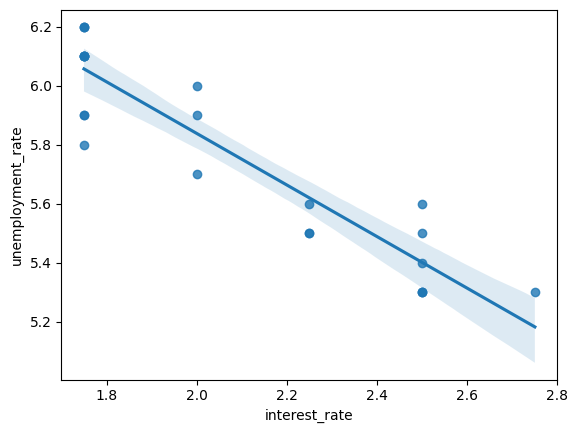

In [21]:
sns.regplot(x=df_index['interest_rate'], y=df_index['unemployment_rate']) # Specify variables using keyword arguments

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

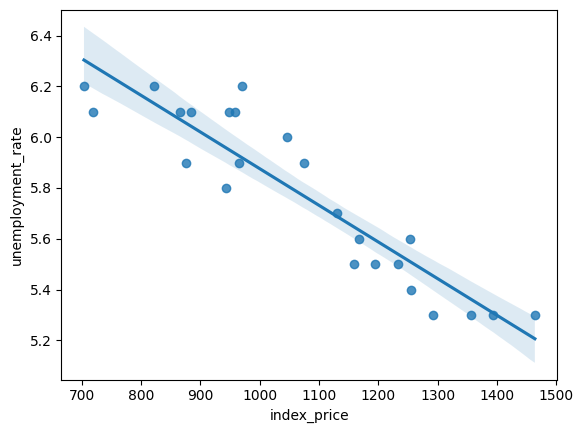

In [22]:
sns.regplot(x=df_index['index_price'], y=df_index['unemployment_rate']) # Specify variables using keyword arguments

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [26]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [27]:
regression.fit(X_train, y_train)

LinearRegression()

In [28]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [29]:
np.mean(validation_score)

-5914.828180162386

In [30]:
# prediction
y_pred = regression.predict(X_test)

In [31]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [32]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712569
59.935781523235484
76.11677139574805


In [33]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.8278978091457145
0.7131630152428576


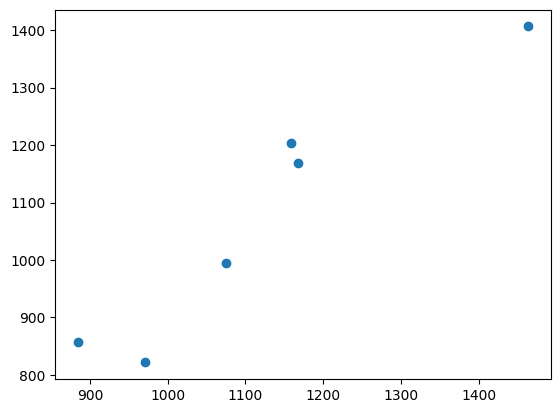

In [34]:
plt.scatter(y_test,y_pred)

In [35]:
residuals = y_test - y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


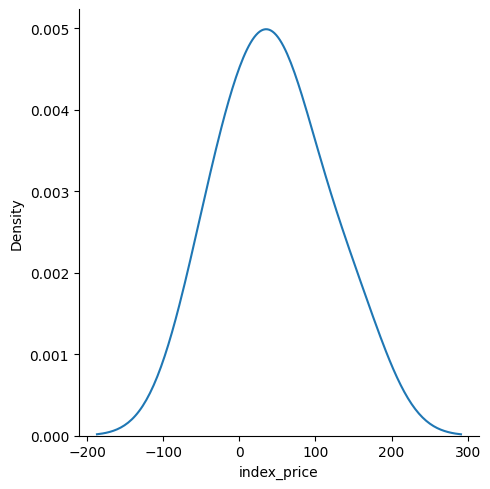

In [36]:
## Plot this residuals
sns.displot(residuals, kind = 'kde')

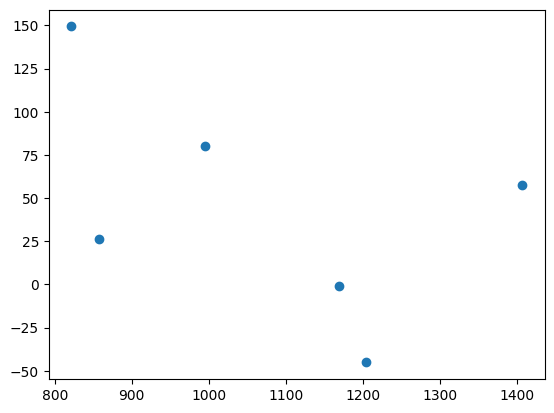

In [37]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred, residuals)

In [38]:
print(regression.coef_)

[  88.27275507 -116.25716066]
